In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics --upgrade -q
from ultralytics import YOLO
import torch, os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

In [4]:
model_path = "/content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/best.pt"
model = YOLO(model_path)
print("Model Loaded")

ALERT_THRESHOLDS = {
    "normal": (0.0, 0.6),
    "moderate": (0.6, 0.85),
    "critical": (0.85, 1.01)
}

Model Loaded


In [8]:
# Paths
test_dir = "/content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test"
output_dir = "/content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_results"
os.makedirs(output_dir, exist_ok=True)

# Collect images
image_paths = glob(f"{test_dir}/*.jpg") + glob(f"{test_dir}/*.png")


In [14]:
def annotate_and_show_save(image_path, class_name, confidence, alert_level, save_dir):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return

    # Resize for consistency
    img = cv2.resize(img, (512, 384))

    # Prepare annotation
    text = f"{class_name.upper()} | {confidence:.2f} | {alert_level}"
    color = (0, 255, 0) if alert_level == "NORMAL" else (0, 255, 255) if alert_level == "MODERATE" else (0, 0, 255)

    # Draw bounding box (whole image)
    cv2.rectangle(img, (10, 10), (img.shape[1] - 10, img.shape[0] - 10), color, 3)

    # Draw background + text
    cv2.rectangle(img, (30, 30), (500, 90), (0, 0, 0), -1)
    cv2.putText(img, text, (40, 75), cv2.FONT_HERSHEY_PLAIN, 1.1, color, 2)

    # Show in notebook
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

    # Save to results directory
    save_path = os.path.join(save_dir, os.path.basename(image_path))
    cv2.imwrite(save_path, img)


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/Sample-EEG-recording-of-a-single-electrode.png: 224x224 interictal 0.78, preictal 0.18, ictal 0.04, 19.0ms
Speed: 10.3ms preprocess, 19.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Sample-EEG-recording-of-a-single-electrode.png
Prediction: interictal (0.78) - ALERT LEVEL: MODERATE


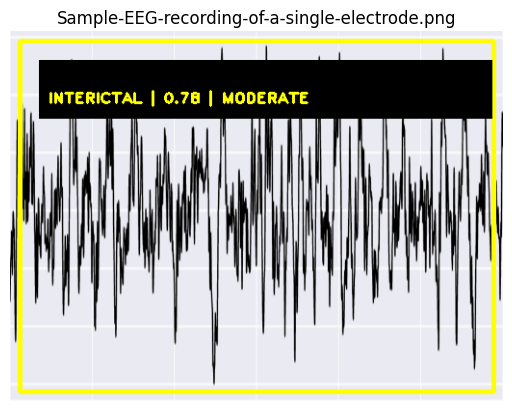


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/test1.png: 224x224 preictal 0.68, ictal 0.27, interictal 0.05, 16.9ms
Speed: 10.0ms preprocess, 16.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
test1.png
Prediction: preictal (0.68) - ALERT LEVEL: MODERATE


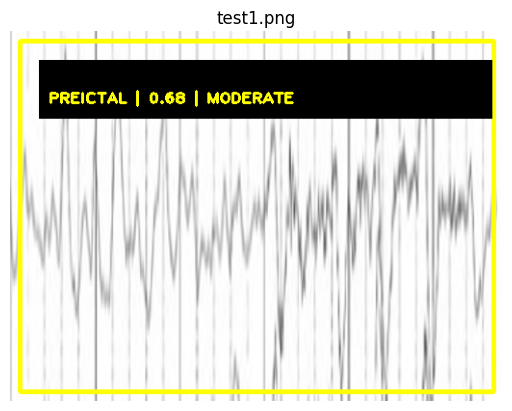


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/Copy of ictal5.png: 224x224 ictal 0.95, preictal 0.05, interictal 0.00, 15.8ms
Speed: 6.0ms preprocess, 15.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Copy of ictal5.png
Prediction: ictal (0.95) - ALERT LEVEL: CRITICAL


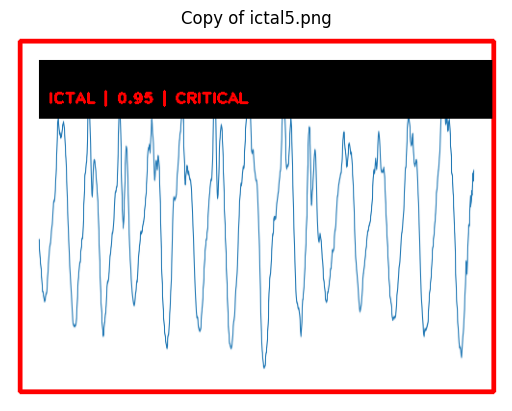


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/ictal45.png: 224x224 ictal 0.83, preictal 0.16, interictal 0.01, 24.7ms
Speed: 8.1ms preprocess, 24.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
ictal45.png
Prediction: ictal (0.83) - ALERT LEVEL: MODERATE


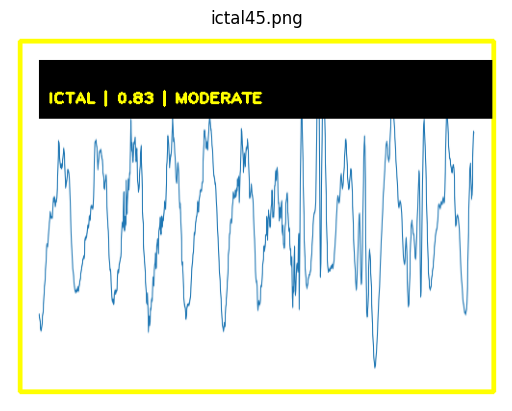


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/interictal12.png: 224x224 interictal 0.87, preictal 0.13, ictal 0.00, 19.5ms
Speed: 6.8ms preprocess, 19.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
interictal12.png
Prediction: interictal (0.87) - ALERT LEVEL: CRITICAL


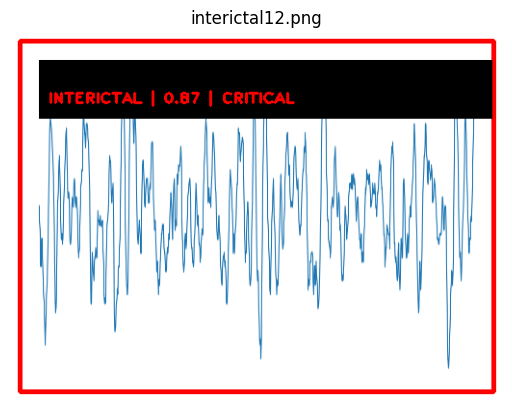


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/preictal49.png: 224x224 preictal 0.73, interictal 0.25, ictal 0.02, 20.6ms
Speed: 7.5ms preprocess, 20.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
preictal49.png
Prediction: preictal (0.73) - ALERT LEVEL: MODERATE


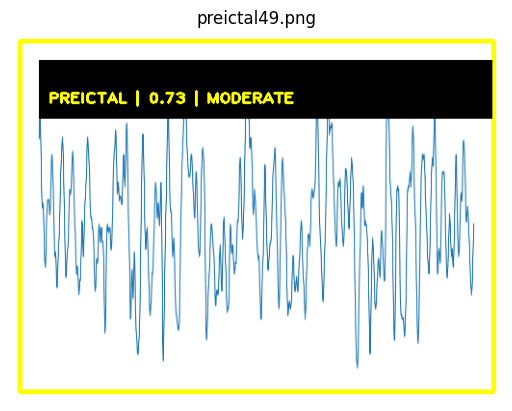


image 1/1 /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_Dataset_Split/test/preictal3.png: 224x224 preictal 0.92, ictal 0.07, interictal 0.01, 22.3ms
Speed: 8.7ms preprocess, 22.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
preictal3.png
Prediction: preictal (0.92) - ALERT LEVEL: CRITICAL


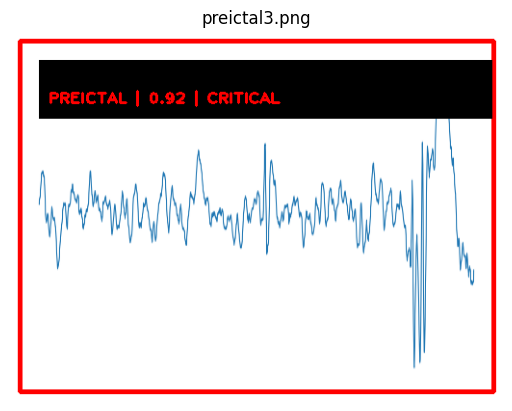

In [15]:
log_data = []

for img_path in image_paths:
    results = model(img_path)
    probs = results[0].probs

    class_id = probs.top1
    conf = float(probs.top1conf)
    class_name = results[0].names[class_id]

    # Determine alert level
    alert_level = next(
        (level.upper() for level, (low, high) in ALERT_THRESHOLDS.items() if low <= conf < high),
        "UNKNOWN"
    )

    # Terminal log
    print(f"{os.path.basename(img_path)}")
    print(f"Prediction: {class_name} ({conf:.2f}) - ALERT LEVEL: {alert_level}")

    # Annotate + show/save
    annotate_and_show_save(img_path, class_name, conf, alert_level, output_dir)

    # Log entry
    log_data.append({
        "image": os.path.basename(img_path),
        "prediction": class_name,
        "confidence": round(conf, 3),
        "alert_level": alert_level
    })

In [16]:
csv_path = os.path.join(output_dir, "eeg_predictions_log.csv")
pd.DataFrame(log_data).to_csv(csv_path, index=False)
print(f"\n CSV log saved at: {csv_path}")


 CSV log saved at: /content/drive/MyDrive/Colab Notebooks/EEG_Classification_data/EEG_results/eeg_predictions_log.csv
